# Análise de Regressão Linear - Communities and Crime Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos Dados

In [2]:
colunas = [
    'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
    'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
    'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
    'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
    'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
    'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
    'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
    'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv',
    'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
    'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
    'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
    'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell',
    'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR',
    'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
    'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
    'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent',
    'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
    'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
    'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
    'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
    'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
    'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
    'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
    'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop',
    'ViolentCrimesPerPop'
]

df = pd.read_csv('communities.data', names=colunas, na_values='?')
print(f"Dimensões do dataset: {df.shape}")
print(f"Variável alvo: ViolentCrimesPerPop")
df.head()

Dimensões do dataset: (1994, 128)
Variável alvo: ViolentCrimesPerPop


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


## Análise Exploratória dos Dados

In [3]:
print(f"Valores únicos na variável alvo: {df['ViolentCrimesPerPop'].nunique()}")
print(f"Valores faltantes na variável alvo: {df['ViolentCrimesPerPop'].isnull().sum()}")
print(f"\nEstatísticas da variável alvo:")
df['ViolentCrimesPerPop'].describe()

Valores únicos na variável alvo: 98
Valores faltantes na variável alvo: 0

Estatísticas da variável alvo:


,ViolentCrimesPerPop
count,1994.000000
mean,0.237979
std,0.232985
min,0.000000
25%,0.070000
50%,0.150000
75%,0.330000
max,1.000000


In [4]:
valores_faltantes = df.isnull().sum()
percentual_faltantes = (valores_faltantes / len(df)) * 100
analise_faltantes = pd.DataFrame({
    'Coluna': valores_faltantes.index,
    'Valores_Faltantes': valores_faltantes.values,
    'Percentual': percentual_faltantes.values
})
analise_faltantes = analise_faltantes[analise_faltantes['Valores_Faltantes'] > 0].sort_values('Percentual', ascending=False)

print(f"Total de colunas com valores faltantes: {len(analise_faltantes)}")
print("\nTop 10 colunas com mais valores faltantes:")
analise_faltantes.head(10)

Total de colunas com valores faltantes: 25

Top 10 colunas com mais valores faltantes:


,Coluna,Valores_Faltantes,Percentual
102,LemasSwFTPerPop,1675,84.002006
105,LemasTotalReq,1675,84.002006
101,LemasSwornFT,1675,84.002006
104,LemasSwFTFieldPerPop,1675,84.002006
103,LemasSwFTFieldOps,1675,84.002006
106,LemasTotReqPerPop,1675,84.002006
109,RacialMatchCommPol,1675,84.002006
108,PolicPerPop,1675,84.002006
107,PolicReqPerOffic,1675,84.002006
115,OfficAssgnDrugUnits,1675,84.002006


## Pré-processamento dos Dados

### Remoção de Colunas Não Preditivas

In [5]:
colunas_nao_preditivas = ['state', 'county', 'community', 'communityname', 'fold']
df_limpo = df.drop(columns=colunas_nao_preditivas)

X = df_limpo.drop('ViolentCrimesPerPop', axis=1)
y = df_limpo['ViolentCrimesPerPop']

print(f"Colunas removidas: {colunas_nao_preditivas}")
print(f"Dimensões após remoção: {X.shape}")

Colunas removidas: ['state', 'county', 'community', 'communityname', 'fold']
Dimensões após remoção: (1994, 122)


### Tratamento de Valores Nulos na Variável Alvo

In [6]:
mascara_validos = ~y.isnull()
X = X[mascara_validos]
y = y[mascara_validos]

print(f"Dados após remoção de valores nulos na variável alvo: {X.shape}")
print(f"Valores nulos restantes na variável alvo: {y.isnull().sum()}")

Dados após remoção de valores nulos na variável alvo: (1994, 122)
Valores nulos restantes na variável alvo: 0


### Identificação e Remoção de Colunas com Muitos Valores Faltantes

In [7]:
limite_faltantes = 0.5
colunas_muitos_faltantes = X.columns[X.isnull().mean() > limite_faltantes].tolist()

In [8]:
X_processado = X.drop(columns=colunas_muitos_faltantes)
print(f"Dimensões após remoção de colunas com muitos faltantes: {X_processado.shape}")
print(f"Valores faltantes restantes: {X_processado.isnull().sum().sum()}")

Dimensões após remoção de colunas com muitos faltantes: (1994, 100)
Valores faltantes restantes: 1


### Imputação de Valores Faltantes Restantes

In [9]:
imputador = SimpleImputer(strategy='median')
X_final = pd.DataFrame(
    imputador.fit_transform(X_processado),
    columns=X_processado.columns,
    index=X_processado.index
)

print(f"Dimensões finais dos dados: {X_final.shape}")
print(f"Valores faltantes após imputação: {X_final.isnull().sum().sum()}")
print(f"\nEstatísticas finais:")
print(f"- Features utilizadas: {X_final.shape[1]}")
print(f"- Amostras: {X_final.shape[0]}")
print(f"- Colunas removidas por muitos faltantes: {len(colunas_muitos_faltantes)}")

Dimensões finais dos dados: (1994, 100)
Valores faltantes após imputação: 0

Estatísticas finais:
- Features utilizadas: 100
- Amostras: 1994
- Colunas removidas por muitos faltantes: 22


## Divisão dos Dados e Treinamento do Modelo

### Divisão Treino/Teste (70/30)

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_final, y, test_size=0.3, random_state=42
)

print(f"Conjunto de treino: {X_treino.shape[0]} amostras ({X_treino.shape[0]/len(X_final)*100:.1f}%)")
print(f"Conjunto de teste: {X_teste.shape[0]} amostras ({X_teste.shape[0]/len(X_final)*100:.1f}%)")

Conjunto de treino: 1395 amostras (70.0%)
Conjunto de teste: 599 amostras (30.0%)


### Treinamento do Modelo de Regressão Linear

In [11]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

print("Modelo de regressão linear treinado com sucesso!")
print(f"Número de coeficientes: {len(modelo.coef_)}")
print(f"Intercepto: {modelo.intercept_:.4f}")

Modelo de regressão linear treinado com sucesso!
Número de coeficientes: 100
Intercepto: 0.6599


### Predições e Avaliação do Modelo

In [12]:
y_pred_treino = modelo.predict(X_treino)
y_pred_teste = modelo.predict(X_teste)

rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))
mae_treino = mean_absolute_error(y_treino, y_pred_treino)
mae_teste = mean_absolute_error(y_teste, y_pred_teste)

print("RESULTADOS DO MODELO:")
print(f"TREINO - RMSE: {rmse_treino:.4f}, MAE: {mae_treino:.4f}")
print(f"TESTE  - RMSE: {rmse_teste:.4f}, MAE: {mae_teste:.4f}")
print(f"\nR² Score:")
print(f"TREINO: {modelo.score(X_treino, y_treino):.4f}")
print(f"TESTE:  {modelo.score(X_teste, y_teste):.4f}")

RESULTADOS DO MODELO:
TREINO - RMSE: 0.1299, MAE: 0.0924
TESTE  - RMSE: 0.1324, MAE: 0.0954

R² Score:
TREINO: 0.7029
TESTE:  0.6339


## Análise de Importância das Features

In [13]:
importancia_features = pd.DataFrame({
    'Feature': X_final.columns,
    'Coeficiente': modelo.coef_,
    'Coeficiente_Abs': np.abs(modelo.coef_)
}).sort_values('Coeficiente_Abs', ascending=False)

print("Top 15 features mais importantes:")
importancia_features.head(15)[['Feature', 'Coeficiente']]

Top 15 features mais importantes:


,Feature,Coeficiente
41,TotalPctDiv,-0.655191
67,PctPersOwnOccup,-0.555897
64,PersPerOccupHous,0.537158
38,MalePctDivorce,0.483512
73,PctHousOwnOcc,0.428850
58,PctRecImmig8,0.414497
21,whitePerCap,-0.338789
85,MedRent,0.313886
82,RentLowQ,-0.278352
7,agePct12t29,-0.277668


## Visualização dos Resultados

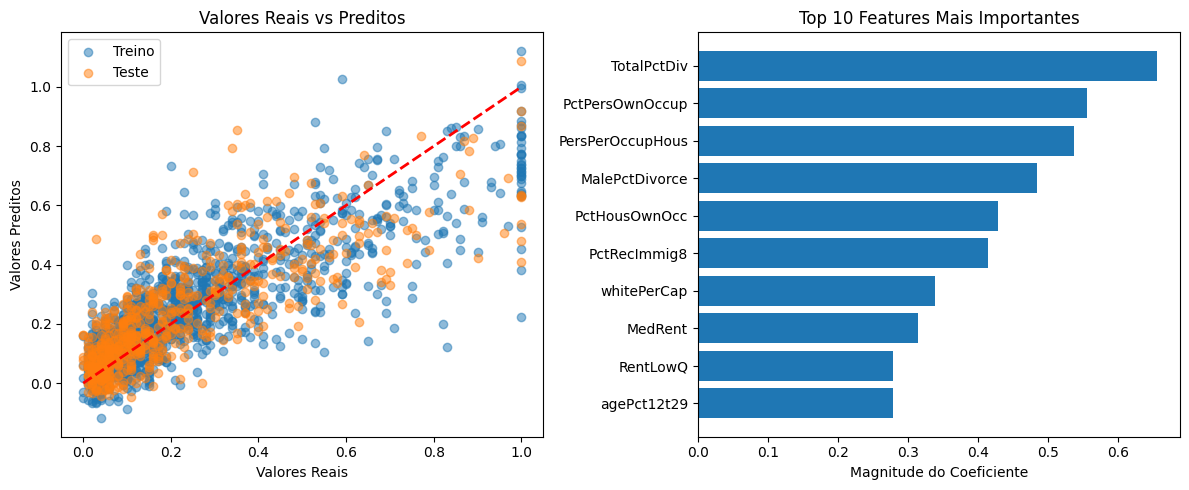

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_treino, y_pred_treino, alpha=0.5, label='Treino')
plt.scatter(y_teste, y_pred_teste, alpha=0.5, label='Teste')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Preditos')
plt.legend()

plt.subplot(1, 2, 2)
top_features = importancia_features.head(10)
plt.barh(range(len(top_features)), top_features['Coeficiente_Abs'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Magnitude do Coeficiente')
plt.title('Top 10 Features Mais Importantes')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Considerações Finais

In [15]:
print("RESUMO DA ANÁLISE")
print(f"1. Dataset original: {df.shape[0]} amostras, {df.shape[1]} colunas")
print(f"2. Colunas removidas por serem não-preditivas: {len(colunas_nao_preditivas)}")
print(f"3. Colunas removidas por >50% valores faltantes: {len(colunas_muitos_faltantes)}")
print(f"4. Features finais utilizadas: {X_final.shape[1]}")
print(f"5. Amostras válidas: {X_final.shape[0]}")
print(f"\nPERFORMANCE DO MODELO")
print(f"- RMSE Teste: {rmse_teste:.4f}")
print(f"- MAE Teste: {mae_teste:.4f}")
print(f"- R² Teste: {modelo.score(X_teste, y_teste):.4f}")
print(f"\nESTRATÉGIAS APLICADAS")
print("- Remoção de colunas não preditivas")
print("- Remoção de colunas com >50% valores faltantes")
print("- Imputação pela mediana para valores faltantes restantes")
print("- Divisão aleatória 70/30 para treino/teste")

RESUMO DA ANÁLISE
1. Dataset original: 1994 amostras, 128 colunas
2. Colunas removidas por serem não-preditivas: 5
3. Colunas removidas por >50% valores faltantes: 22
4. Features finais utilizadas: 100
5. Amostras válidas: 1994

PERFORMANCE DO MODELO
- RMSE Teste: 0.1324
- MAE Teste: 0.0954
- R² Teste: 0.6339

ESTRATÉGIAS APLICADAS
- Remoção de colunas não preditivas
- Remoção de colunas com >50% valores faltantes
- Imputação pela mediana para valores faltantes restantes
- Divisão aleatória 70/30 para treino/teste
